<H1>Bài 7 _ Thực hành

<h3>(Lập trình) Xây dựng ứng dụng nhận dạng số viết tay dựa trên dữ liệu MNIST5. Đây là thư viện chữ số viết tay được gán nhãn sẵn và được hỗ trợ trực tiếp trong sklearn. 

<h3>Import các thư viện cần thiết

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets,tree,metrics


<h3>Download dữ liệu có sẵn trong thư viện sklearn

In [ ]:
digits = datasets.load_digits()

<h3>Biểu diễn 4 mẫu dữ liệu huấn luyện tương ứng với 4 lớp 0, 1, 2, 3

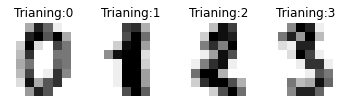

In [ ]:
_, axes =plt.subplots(1,4)
images_and_labels = list(zip(digits.images,digits.target))
for ax,(image,label) in zip(axes,images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title('Trianing:%i'% label)
plt.show()

<h3>Chuyển đổi mỗi đối tượng hình ảnh – ma trận 8x8 thành ma trận 1x64 để thỏa yêu cầu đầu vào của thuật toán.

In [ ]:
n_samples=len(digits.images)
data = digits.images.reshape((n_samples,-1))

<h3>Sử dụng thuật toán cây ID3

In [ ]:
classifer = tree.DecisionTreeClassifier(criterion="entropy",random_state=33)

<h3>Chia dữ liệu thành hai phần: huấn luyện 80%, kiểm thử 20%

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data,digits.target,test_size=0.2,shuffle=False)

<h3>Tiến hành xây dựng cây ID3

In [ ]:
classifer.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=33)

<h3>Dự đoán nhãn dữ liệu cho tập kiểm thử

In [ ]:
predicted = classifer.predict(x_test)

<h3>Biểu diễn một vài kết quả dự đoán

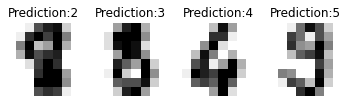

In [ ]:
_, axes =plt.subplots(1,4)
images_and_predictions = list(zip(digits.images[n_samples//2:],predicted))
for ax,(image,prediction) in zip(axes,images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title('Prediction:%i'% prediction)
plt.show()

<h3>Thông số đạt được của cây ID3

Classificaion report for classifier DecisionTreeClassifier(criterion='entropy', random_state=33):
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.72      0.64      0.68        36
           2       0.76      0.74      0.75        35
           3       0.69      0.59      0.64        37
           4       0.86      0.84      0.85        37
           5       0.80      0.95      0.86        37
           6       0.97      0.95      0.96        37
           7       0.78      0.86      0.82        36
           8       0.79      0.82      0.81        33
           9       0.72      0.70      0.71        37

    accuracy                           0.80       360
   macro avg       0.80      0.80      0.79       360
weighted avg       0.80      0.80      0.79       360


Confustion matri:\m[[31  0  0  0  1  0  0  0  1  2]
 [ 0 23  0  2  2  0  0  1  1  7]
 [ 1  2 26  0  0  1  0  3  2  0]
 [ 0  4  2 22  0  4  0  

C:\Users\phuon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


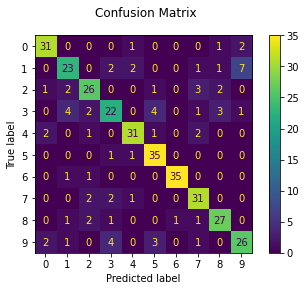

In [ ]:
print("Classificaion report for classifier %s:\n%s\n"%(classifer,metrics.classification_report(y_test,predicted)))
disp = metrics.plot_confusion_matrix(classifer,x_test,y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confustion matri:\m%s"% disp.confusion_matrix)

<h3>Cài đặt thư viện xử lý hình ảnh pillow cho Python và import vào

In [ ]:
from PIL import Image,ImageOps
import numpy as np

<h3>Chụp ảnh một chữ số viết tay bất kỳ, cắt theo hình vuông sát với ký tự như hình minh họa dưới đây

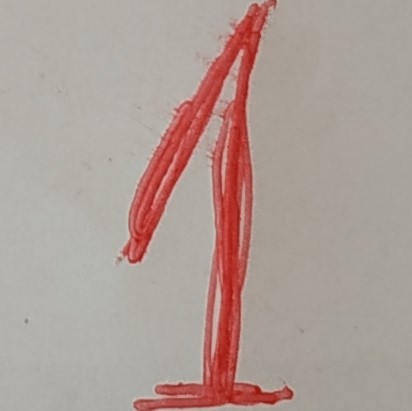

<h3>Đọc hình trên vào phần mềm

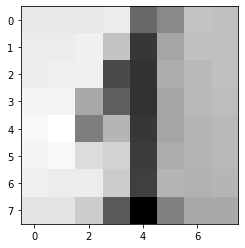

In [ ]:
img  = Image.open("E:\\IS252\\Lab4\\data\\mnist5\\sample_1.jpg").convert("L").resize((8,8))
img = ImageOps.invert(img)
im2arr = np.array(img)
plt.imshow(im2arr,cmap=plt.cm.gray_r,interpolation='nearest')

<h3>Làm rõ nét lại bức ảnh bằng cách phân biệt rõ những giá trị đen, trắng. 

In [ ]:
img1d = im2arr.reshape([1,64])
img1d[img1d>109]=155
img1d[img1d<110]=0
img1d

array([[  0,   0,   0,   0, 155,   0,   0,   0,   0,   0,   0,   0, 155,
          0,   0,   0,   0,   0,   0, 155, 155,   0,   0,   0,   0,   0,
          0, 155, 155,   0,   0,   0,   0,   0,   0,   0, 155,   0,   0,
          0,   0,   0,   0,   0, 155,   0,   0,   0,   0,   0,   0,   0,
        155,   0,   0,   0,   0,   0,   0, 155, 155,   0,   0,   0]],
      dtype=uint8)

<h3>Hình ảnh chữ số sau khi làm rõ

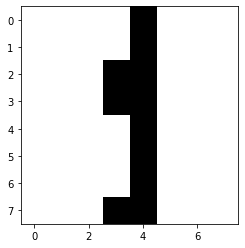

In [ ]:
plt.imshow(im2arr,cmap=plt.cm.gray_r,interpolation='nearest')

<h3>Tiến hành nhận diện bằng cây ID3 và in ra kết quả

In [ ]:
y_pred = classifer.predict(img1d)
print(y_pred)

[1]
